In [1]:
with open('grimms.txt', encoding='utf-8', errors='ignore') as f:
    text = f.read()


len(text)

537278

In [2]:
text[:11]

'THE BROTHER'

In [3]:
import string

allowed = set(string.printable)
text = ''.join(ch for ch in text if ch in allowed)

chars =sorted(set(list(text)))
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for i, ch in enumerate(chars)}

def encode(s):
    return [stoi[c] for c in s]

def decode(l):
    return ''.join([itos[i] for i in l])

vocab_size = len(chars)
print(vocab_size)

82


In [4]:
# the brother

for i in range(len(text[:11]) - 1):
    input_char = text[:11][i]
    target_char = text[:11][i + 1]
    print(f"  '{input_char}' → '{target_char}'")

  'T' → 'H'
  'H' → 'E'
  'E' → ' '
  ' ' → 'B'
  'B' → 'R'
  'R' → 'O'
  'O' → 'T'
  'T' → 'H'
  'H' → 'E'
  'E' → 'R'


In [5]:
# dataset
xs = []
ys = [] # target

for i in range(len(text) - 1):
    input_char = text[i]
    target_char = text[i + 1]

    xs.append(stoi[input_char])
    ys.append(stoi[target_char])

In [6]:
# First 5 examples
[(xs[i],itos[xs[i]], ys[i], itos[ys[i]]) for i in range(5)]

[(46, 'T', 34, 'H'),
 (34, 'H', 31, 'E'),
 (31, 'E', 1, ' '),
 (1, ' ', 28, 'B'),
 (28, 'B', 44, 'R')]

In [7]:
import torch

xs = torch.tensor(xs)
ys = torch.tensor(ys)

xs.shape
ys.shape

/var/folders/vm/lyy3xj0j4xdcmhhqjpz379n40000gn/T/ipykernel_2510/3845521898.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xs = torch.tensor(xs)
/var/folders/vm/lyy3xj0j4xdcmhhqjpz379n40000gn/T/ipykernel_2510/3845521898.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ys = torch.tensor(ys)


torch.Size([532137])

In [91]:
# input 
torch.manual_seed(425) # thiet lap ket qua
W = torch.randn((vocab_size, vocab_size), requires_grad=True)
W.shape


torch.Size([82, 82])

In [95]:
import torch.nn.functional as F

for k in range(100):
    
  # Forward pass
  logits = W[xs] # logits cho toàn bộ dataset
  # counts = logits.exp() # (N, 86), all positive
  # probs = counts / counts.sum(1, keepdims=True)  # (N, 86)
  probs = torch.softmax(logits, dim=1)

  # Loss
  loss = F.cross_entropy(logits, ys)
  print(loss.item())

  # Backward pass
  W.grad = None
  loss.backward()

  # Optimization
  learning_rate = 10 # 0.1,0.2,..=>
  with torch.no_grad():
      W -= learning_rate * W.grad

4.370747089385986
4.064561367034912
3.8823561668395996
3.745802402496338
3.6295082569122314
3.5274546146392822
3.4375357627868652
3.3583309650421143
3.288309097290039
3.2258718013763428
3.169585704803467
3.118408679962158
3.071668863296509
3.028949737548828
2.9900102615356445
2.954721450805664
2.922959566116333
2.8945579528808594
2.8692684173583984
2.846766233444214
2.826650381088257
2.808518409729004
2.7920072078704834
2.7768096923828125
2.7626845836639404
2.749455690383911
2.736994504928589
2.7252094745635986
2.7140328884124756
2.703420400619507
2.6933302879333496
2.6837351322174072
2.674607515335083
2.6659271717071533
2.6576807498931885
2.649848699569702
2.6424145698547363
2.635366916656494
2.6286895275115967
2.622368574142456
2.6163887977600098
2.610734224319458
2.605388879776001
2.6003365516662598
2.5955588817596436
2.591038227081299
2.5867559909820557
2.5826950073242188
2.57883620262146
2.5751609802246094
2.5716540813446045
2.56829833984375
2.565079927444458
2.5619850158691406
2.

In [100]:
# generate
def sample(start_token, length=200):
    out = []
    ix = start_token
    for _ in range(length):
        logits = W[ix]
        probs = torch.softmax(logits, dim=0)
        ix = torch.multinomial(probs, num_samples=1).item()
        out.append(itos[ix])
    return ''.join(out)
print(sample(stoi['T'], 300))

hon ser oe Rer on fopgr as he t54%ujYoofore ha  swh the, d skens te aninghuAz')LJxche o ut l he, hery prcywathe! skeand
goneangainnethe, here bene arou]KL; sim, ocou ss t Alyo her ho alene s sd aie womul wothe atlf: t, ay? bige: t wn y)Cse tle Crse BEMy anthtre t G[Motharou one herowep"Yot ndo pplep


In [97]:
def inspect(ch, topk=10):
    ix = stoi[ch]
    logits = W[ix]
    probs = torch.softmax(logits, dim=0)
    top = torch.topk(probs, topk)
    for p, i in zip(top.values, top.indices):
        print(f"{ch!r} -> {itos[i.item()]!r}: {p.item():.3f}")
inspect('T')

'T' -> 'h': 0.826
'T' -> 'o': 0.037
'T' -> 'H': 0.014
'T' -> 'A': 0.006
'T' -> '5': 0.004
'T' -> '0': 0.004
'T' -> 'j': 0.004
'T' -> 'Y': 0.004
'T' -> '6': 0.004
'T' -> '%': 0.004


In [92]:
# find intial good learning rate
lre = torch.linspace(-1, 2, 1000) # 0.1 - 100 
lrs = 10 ** lre

In [93]:
# loop thu learning rate
# reset weights
W = torch.randn((vocab_size, vocab_size), requires_grad=True)

lri = []
lossi = []

for i in range(1000):
    # minibatch
    ix = torch.randint(0, xs.shape[0], (32,))
    
    # forward
    logits = W[xs[ix]]
    loss = F.cross_entropy(logits, ys[ix])
    
    # backward
    W.grad = None
    loss.backward()
    
    # update với learning rate đang thử
    lr = lrs[i]
    W.data -= lr * W.grad
    
    # lưu lại để vẽ
    lri.append(lre[i].item())
    lossi.append(loss.item())
  
    print(loss.item())


5.10359001159668
5.182582378387451
5.047735691070557
5.000215530395508
4.88958215713501
4.772552490234375
4.8130950927734375
4.780378341674805
5.0915937423706055
4.959102630615234
4.819546699523926
4.815877437591553
5.059919834136963
5.230656623840332
4.872889518737793
4.867284297943115
4.788531303405762
4.854907512664795
4.629084587097168
4.61989164352417
4.743160247802734
4.837007522583008
4.581597328186035
4.745519161224365
4.907449245452881
4.889622211456299
4.8784918785095215
4.858963489532471
4.7616119384765625
4.483035087585449
4.792473793029785
4.96248197555542
4.839885711669922
4.700223445892334
4.808627605438232
5.0382585525512695
4.71356725692749
4.677722454071045
4.702213287353516
4.92496395111084
4.8550705909729
4.554232120513916
4.7467803955078125
4.737259864807129
4.837488174438477
4.311316967010498
4.7548441886901855
4.802966117858887
4.962743759155273
4.920787811279297
4.485776424407959
4.342631816864014
4.803092956542969
4.451297283172607
4.777685165405273
4.832108974

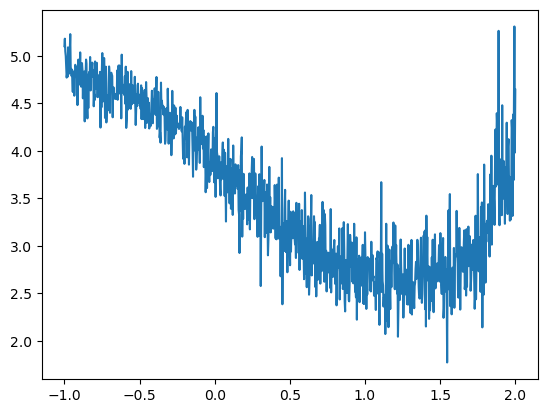

In [94]:
import matplotlib.pyplot as plt
plt.plot(lri, lossi)

In [84]:
# Forward pass
logits = W[xs] # => log_counts
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)
probs = torch.softmax(logits, dim=1)

# Loss
import torch.nn.functional as F
loss = F.cross_entropy(logits, ys)

# Backward pass
W.grad = None
loss.backward()

# Optimization
learning_rate = 0.3
with torch.no_grad():
    W -= learning_rate * W.grad

In [85]:
loss

tensor(4.7811, grad_fn=<NllLossBackward0>)

In [ ]:
# 